In [1]:
import	numpy	as	np 
import	matplotlib.pyplot	as	plt
import	pandas	as	pd 
import	seaborn	as	sns 
import	statsmodels	as	sm

In [7]:
names1880 = pd.read_csv('D:/python_workspace/pydata-book-2nd-edition/datasets/babynames/yob1880.txt',names=['name','sex','births'])

In [5]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [8]:
years = range(1880,2011)
names = None
columns = ['name','sex','births']
for year in years:
    path = 'D:/python_workspace/pydata-book-2nd-edition/datasets/babynames\yob%d.txt' % year
    frame = pd.read_csv(path,names = columns)
    frame['year'] = year
    #pieces.append(frame)
    if names is None:
        names = frame
    else:
        names = pd.concat([names,frame],ignore_index = True)




In [9]:
names.year.value_counts()

2008    35006
2007    34883
2009    34602
2006    34039
2010    33838
        ...  
1885     2294
1882     2127
1883     2084
1880     2000
1881     1935
Name: year, Length: 131, dtype: int64

In [60]:
names.shape

(1690784, 5)

In [11]:
total_births = names.pivot_table('births',index = 'year',columns = 'sex',aggfunc = sum)

In [12]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [15]:
import pygal

line_chart = pygal.Line(x_label_rotation=90)
line_chart.title = 'Total births by sex and year'
line_chart.x_labels = map(str,range(1880,2011))
#line_chart.x_labels = total_births.index
line_chart.add('F', total_births.F)
line_chart.add('M', total_births.M)
line_chart.render_to_file("D:/python_workspace/plot_birthday1.svg")

In [63]:
total_births.index

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='year', length=131)

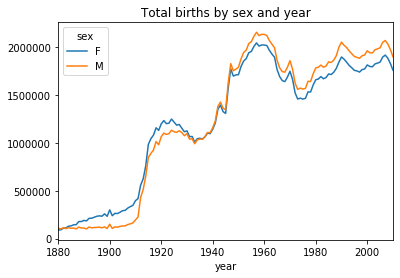

In [25]:
total_births.plot(title='Total births by sex and year')

In [26]:
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)

In [27]:
names[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [28]:
names.loc[(names.sex=='F') & (names.year==1880),'prop'].sum()

1.0

In [29]:
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [30]:
def get_top1000(group):
    return group.sort_values(by = 'births',ascending =False)[:1000]
top1000 = names.groupby(['year','sex']).apply(get_top1000)


In [31]:
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [32]:
top1000.reset_index(inplace=True,drop = True)

In [33]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [34]:
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)

In [64]:
total_births.info()
subset[1:10]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Data columns (total 2 columns):
F    131 non-null int64
M    131 non-null int64
dtypes: int64(2)
memory usage: 3.1 KB


name,John,Harry,Mary,Marilyn
year,,,,
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8179.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9427.0,2338.0,9253.0,NaN
1885,8801.0,2209.0,9166.0,NaN
1886,9074.0,2272.0,9923.0,NaN
1887,8165.0,2070.0,9935.0,NaN
1888,9300.0,2772.0,11804.0,NaN
1889,8600.0,2559.0,11690.0,NaN


In [65]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

KeyError: "None of [Index(['John', 'Harry', 'Mary', 'Marilyn'], dtype='object', name='sex')] are in the [columns]"

In [0]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [0]:
df = boys[boys.year == 2010]

In [0]:
df.head()

In [0]:
prop_cumsum = df.sort_values(by = 'prop',ascending=False).prop.cumsum()

In [0]:
prop_cumsum[:10]

In [0]:
prop_cumsum.values.searchsorted(0.5)

In [0]:
df = boys[boys.year == 1900]

In [0]:
in1900 = df.sort_values(by = 'prop',ascending= False).prop.cumsum()
in1900.values.searchsorted(0.5)+1

In [0]:
def get_quantile_count(group,q=0.5):
   group = group.sort_values(by='prop',ascending = False).prop.cumsum()
   return group.values.searchsorted(q)+1

In [0]:
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
top1000.head()

In [0]:
diversity = diversity.unstack('sex')


In [0]:
diversity.head()

In [0]:
diversity.plot(title = 'Number of popular names in top 50%')

In [0]:
#names.head()
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

In [0]:
table = names.pivot_table('births',index = last_letters,columns=['sex','year'],aggfunc=sum)
subtable = table.reindex(columns = [1910,1960,2010],level = 'year')
subtable.head()

In [0]:
subtable.sum()

In [0]:
letter_prop = subtable/subtable.sum()
letter_prop

In [0]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1,figsize=(10,9))
letter_prop['M'].plot(kind = 'bar' ,rot = 0,ax = axes[0],title = 'Male')
letter_prop['F'].plot(kind = 'bar' ,rot = 0,ax = axes[1],title = 'Female')

In [0]:
letter_prop = table/table.sum()
dny_ts = letter_prop.loc[['d','n','y'],'M'].T
dny_ts.head()
dny_ts.plot()

In [0]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains ('lesl')]
lesley_like

In [0]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

In [0]:
table = filtered.pivot_table('births',index = 'year',columns= 'sex',aggfunc= sum)
table = table.div(table.sum(1),axis = 0)
table.head()
table.plot()

In [0]:
top1000[['births','prop']].head().sum(1)